### Stock Market Prediction And Forecasting Using Stacked LSTM

In [ ]:
### Keras and Tensorflow >2.0

In [1]:
import pandas_datareader as pdr

import sys
sys.path.append('E:/DATA_SCIENCE_PROJ/STOCK_PREDICTION')
from key import key

In [2]:
df = pdr.get_data_tiingo('NVDA', api_key=key)

TypeError: concat() takes 1 positional argument but 2 were given

In [6]:
df.to_csv('NVDA.csv')

In [55]:
import pandas as pd

In [56]:
df=pd.read_csv('NVDA.csv')

In [57]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,NVDA,2019-11-18 00:00:00+00:00,212.28,213.35,203.77,203.89,14382963,5.281213,5.307833,5.069497,5.072482,575318520,0.0,1.0
1,NVDA,2019-11-19 00:00:00+00:00,207.99,211.98,205.65,211.03,10384506,5.174484,5.273749,5.116268,5.250115,415380240,0.0,1.0
2,NVDA,2019-11-20 00:00:00+00:00,211.18,214.55,206.56,207.07,11825438,5.253847,5.337687,5.138908,5.151596,473017520,0.0,1.0
3,NVDA,2019-11-21 00:00:00+00:00,210.18,213.24,209.31,211.00,7209730,5.228968,5.305096,5.207324,5.249369,288389200,0.0,1.0
4,NVDA,2019-11-22 00:00:00+00:00,210.89,212.96,209.94,211.09,5602470,5.246632,5.298130,5.222997,5.251608,224098800,0.0,1.0


In [58]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1251,NVDA,2024-11-07 00:00:00+00:00,148.88,148.93,146.17,146.39,207323303,148.88,148.93,146.17,146.39,207323303,0.0,1.0
1252,NVDA,2024-11-08 00:00:00+00:00,147.63,149.77,146.26,148.77,175665830,147.63,149.77,146.26,148.77,175665830,0.0,1.0
1253,NVDA,2024-11-11 00:00:00+00:00,145.26,148.85,143.57,148.68,182325620,145.26,148.85,143.57,148.68,182325620,0.0,1.0
1254,NVDA,2024-11-12 00:00:00+00:00,148.29,149.65,146.01,146.78,198634738,148.29,149.65,146.01,146.78,198634738,0.0,1.0
1255,NVDA,2024-11-13 00:00:00+00:00,146.27,149.33,145.90,149.07,191903267,146.27,149.33,145.90,149.07,191903267,0.0,1.0


In [59]:
df1=df.reset_index()['close']

In [60]:
df1

0       212.28
1       207.99
2       211.18
3       210.18
4       210.89
         ...  
1251    148.88
1252    147.63
1253    145.26
1254    148.29
1255    146.27
Name: close, Length: 1256, dtype: float64

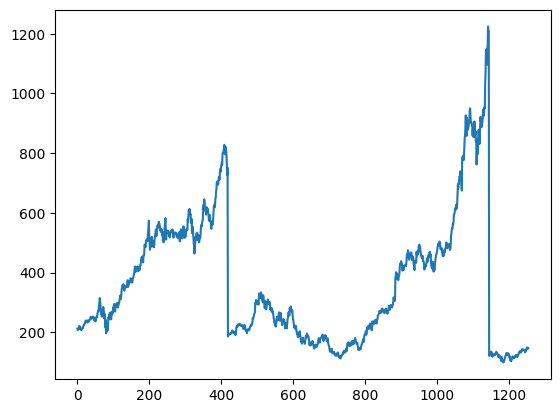

In [61]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [63]:
import numpy as np

In [64]:
df1

0       212.28
1       207.99
2       211.18
3       210.18
4       210.89
         ...  
1251    148.88
1252    147.63
1253    145.26
1254    148.29
1255    146.27
Name: close, Length: 1256, dtype: float64

In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [66]:
print(df1)

[[0.10072946]
 [0.09691779]
 [0.09975211]
 ...
 [0.04118206]
 [0.04387422]
 [0.04207945]]


In [67]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [68]:
training_size,test_size

(816, 440)

In [69]:
train_data

array([[0.10072946],
       [0.09691779],
       [0.09975211],
       [0.09886361],
       [0.09949444],
       [0.10866378],
       [0.10492319],
       [0.10602493],
       [0.10469218],
       [0.0980373 ],
       [0.09662458],
       [0.09818834],
       [0.09758416],
       [0.10063172],
       [0.10063172],
       [0.10223991],
       [0.10522528],
       [0.1112049 ],
       [0.11113382],
       [0.11216448],
       [0.11495438],
       [0.11603835],
       [0.12132493],
       [0.12479898],
       [0.1243103 ],
       [0.1241326 ],
       [0.12463905],
       [0.12257772],
       [0.11853504],
       [0.12118277],
       [0.12527877],
       [0.12186692],
       [0.12274654],
       [0.12529654],
       [0.12569636],
       [0.12804201],
       [0.12919706],
       [0.13600299],
       [0.13182703],
       [0.13030769],
       [0.13329305],
       [0.13360403],
       [0.13241344],
       [0.13434149],
       [0.13678487],
       [0.13467023],
       [0.12553643],
       [0.132

In [70]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [71]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [72]:
print(X_train.shape), print(y_train.shape)

(715, 100)
(715,)


(None, None)

In [73]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [74]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [75]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [76]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


c:\Users\Daanish Mittal\anaconda3\envs\stock_env\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [77]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [78]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [79]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - loss: 0.0422 - val_loss: 0.0396
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0118 - val_loss: 0.0225
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0061 - val_loss: 0.0210
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0035 - val_loss: 0.0201
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0051 - val_loss: 0.0180
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0032 - val_loss: 0.0171
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0025 - val_loss: 0.0172
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0029 - val_loss: 0.0148
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0020 - val_loss: 0.0140
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0025 - val_loss: 0.0129
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0034 - val_loss: 0.0120
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step

In [80]:
import tensorflow as tf

In [81]:
tf.__version__

'2.18.0'

In [82]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [83]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [84]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

376.79811368824465

In [85]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

519.9027040794554

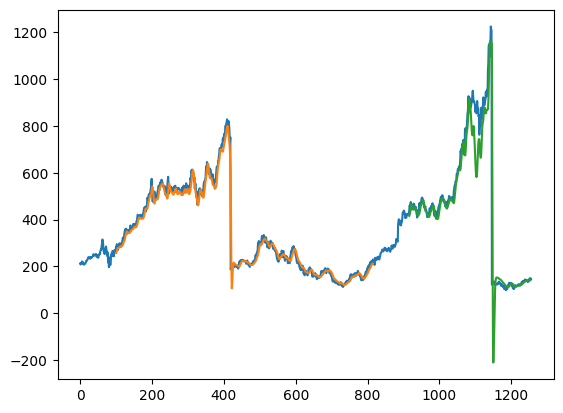

In [86]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [87]:
len(test_data)

440

In [88]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 99)

In [89]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [90]:
temp_input

[0.024424917147198105,
 0.022283627575544862,
 0.021883801721916674,
 0.022559063163599846,
 0.02111080507156883,
 0.026095300713467023,
 0.023918471065935726,
 0.026024220561710887,
 0.028849656594016823,
 0.0319860682902558,
 0.02531341904414966,
 0.026948262534540524,
 0.02623746101697927,
 0.02438937707132005,
 0.016952616193835562,
 0.019706972074385376,
 0.01689930608001848,
 0.021883801721916674,
 0.021039724919812708,
 0.013629619099236781,
 0.01187927036224222,
 0.012572301841864433,
 0.01126620405334565,
 0.0042825791433064725,
 0.01609076935379257,
 0.009151569538600954,
 0.007427875858514954,
 0.0013682929213053863,
 0.004744600129721277,
 0.0,
 0.005384321495526395,
 0.005188851078197054,
 0.00898275417818016,
 0.015308887684475206,
 0.017032581364561206,
 0.021279620431989624,
 0.022807843694746283,
 0.027623523976223682,
 0.02518014375960692,
 0.026290771130796364,
 0.022061502101306973,
 0.02706376778114422,
 0.0244782272610152,
 0.026113070751406064,
 0.023723000648606

In [91]:
from numpy import array
import numpy as np

lst_output = []
n_steps = 100
i = 0

# Ensure temp_input has at least n_steps elements
if len(temp_input) < n_steps:
    # Add demo data to fill up to n_steps if necessary
    while len(temp_input) < n_steps:
        demo_value = np.median(temp_input) if temp_input else 0  # Use median of temp_input or 0
        temp_input.append(demo_value)

while i < 30:
    if len(temp_input) > 100:
        # Taking the first 100 values (ensuring we only use the most recent data)
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i, x_input))
        
        # Reshaping input for the model
        x_input = x_input.reshape(1, -1)  # Flatten to 1D
        x_input = x_input.reshape((1, n_steps, 1))  # Reshape to 3D for LSTM input
        
        # Making the prediction
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        
        # Extend the temp_input with prediction and update
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        # If there is insufficient data in temp_input, reshape accordingly
        x_input = np.array(temp_input).reshape((1, n_steps, 1))  # Reshaping to meet model's input shape
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        
        # Extend with predictions and update temp_input
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i += 1

print(lst_output)


[0.0400827]
101
1 day input [0.02228363 0.0218838  0.02255906 0.02111081 0.0260953  0.02391847
 0.02602422 0.02884966 0.03198607 0.02531342 0.02694826 0.02623746
 0.02438938 0.01695262 0.01970697 0.01689931 0.0218838  0.02103972
 0.01362962 0.01187927 0.0125723  0.0112662  0.00428258 0.01609077
 0.00915157 0.00742788 0.00136829 0.0047446  0.         0.00538432
 0.00518885 0.00898275 0.01530889 0.01703258 0.02127962 0.02280784
 0.02762352 0.02518014 0.02629077 0.0220615  0.02706377 0.02447823
 0.02611307 0.023723   0.01659722 0.01817875 0.00807648 0.00648606
 0.00737457 0.00348293 0.00671707 0.00816533 0.01599303 0.01797439
 0.01793885 0.01587753 0.01482021 0.01284774 0.016846   0.0151845
 0.01541551 0.0195115  0.02185715 0.02232805 0.01998241 0.02001795
 0.016073   0.01771673 0.02127074 0.02310993 0.02559774 0.03019129
 0.02997805 0.03189722 0.03188833 0.03479373 0.02904513 0.03270575
 0.03378084 0.03473154 0.03980488 0.03969826 0.0361176  0.03687283
 0.03787684 0.03697056 0.03761917 0

In [92]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [93]:
import matplotlib.pyplot as plt

In [94]:
len(df1)

1256

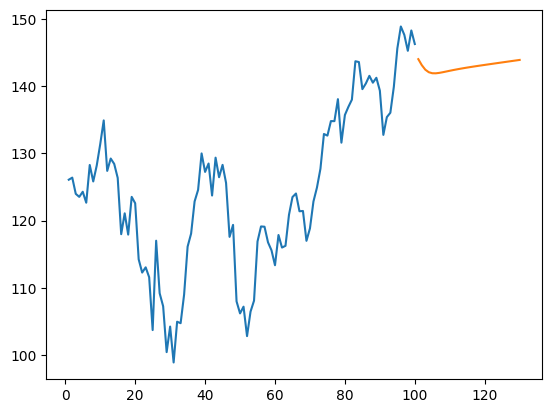

In [95]:
plt.plot(day_new,scaler.inverse_transform(df1[1156:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

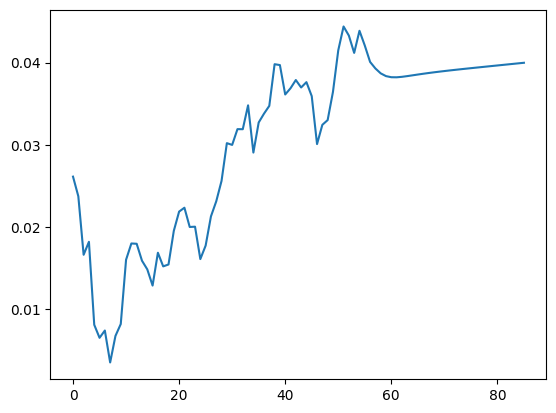

In [96]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [97]:
df3=scaler.inverse_transform(df3).tolist()

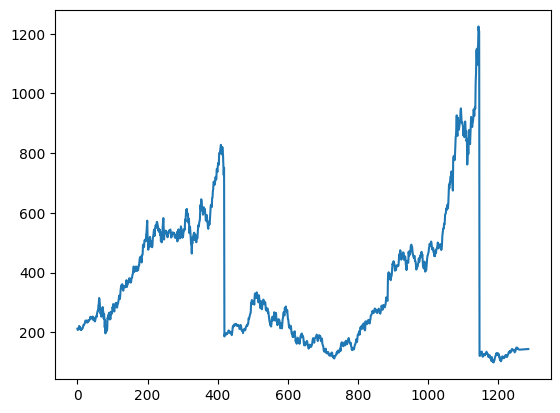

In [98]:
plt.plot(df3)